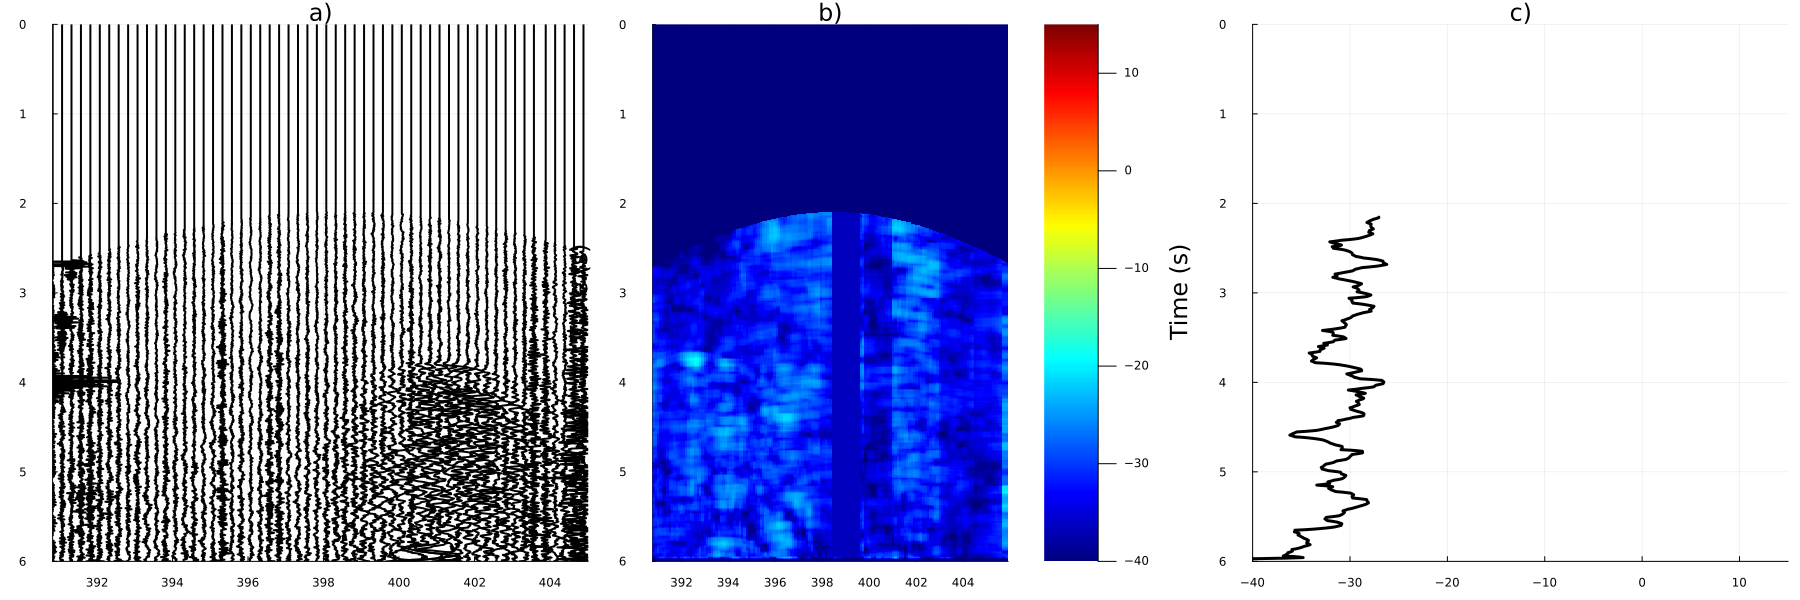

Average SNR: -30.869146


In [15]:
using Plots, FileIO

# Parameters
nt = 1001
nd = 1131  
np = 153
dt = 0.006
t = 0:dt:(nt-1)*dt

# Read binary data files
function read_binary_float32(filename, dims)
    open(filename, "r") do file
        data = Array{Float32}(undef, dims...)
        read!(file, data)
        return data
    end
end

# Read data files
data = read_binary_float32("data6.bin", (nt, nd))
SNR_sembl3 = read_binary_float32("data6.bin", (nt, np))
x = read_binary_float32("x_fig6.bin", (nd,))

# Generate xp array
xp = range(x[1], x[1] + 99/1000*(np-1), length=np)

# Create figure with 3 subplots
fig = plot(layout=(1,3), size=(1800, 600))

# Subplot 1: Wiggle traces
plot!(fig[1], xlims=(minimum(x), maximum(x)), ylims=(0, maximum(t)))
for i in 1:20:nd
    plot!(fig[1], data[:,i]*3.5 .+ x[i], t, 
          color=:black, linewidth=2, label="")
end
plot!(fig[1], yflip=true, 
      title="a)", 
      ylabel="Time (s)", 
      xlabel="X_rec (Km)",
      titlefontsize=16, 
      guidefontsize=16)

# Subplot 2: SNR heatmap
heatmap!(fig[2], xp, t, SNR_sembl3, 
         clims=(-40, 15), 
         color=:jet,
         yflip=true,
         aspect_ratio=:auto,
         title="b)",
         ylabel="Time (s)",
         xlabel="X_rec (Km)",
         titlefontsize=16,
         guidefontsize=16)

# Subplot 3: 1D SNR profile
SNR1d = vec(sum(SNR_sembl3[:, 61:77], dims=2) / 17)
plot!(fig[3], SNR1d[360:nt], t[360:nt],
      color=:black, 
      linewidth=3,
      xlims=(-40, 15),
      ylims=(0, maximum(t)),
      yflip=true,
      title="c)",
      ylabel="Time (s)",
      xlabel="SNR (dB)",
      titlefontsize=16,
      guidefontsize=16,
      label="")

# Display the figure
display(fig)

# Calculate and print average SNR
avg_snr = sum(SNR1d[360:nt]) / (nt - 360 + 1)
println("Average SNR: ", avg_snr)